Short press info - 46 categories

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import reuters
from keras.utils import to_categorical
import numpy as np

2023-03-02 19:40:33.646589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 19:40:33.695514: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [27]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000) 

In [3]:
len(set(y_train))

46

In [4]:
X_train[0][:10] # word indexes again - transformation needed e.g. one-hot encoding (to_categorical)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [28]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [30]:
X_test = vectorize_sequences(X_test)
X_train = vectorize_sequences(X_train)

In [53]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(10000,)),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])

In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
X_val = X_train[:1000]
X_train = X_train[1000:]

y_val = y_train[:1000]
y_train = y_train[1000:]

In [55]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 12ms/step - loss: 3.3424 - accuracy: 0.3341 - val_loss: 2.6173 - val_accuracy: 0.4640
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 2.0571 - accuracy: 0.5937 - val_loss: 1.6508 - val_accuracy: 0.6410
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.3749 - accuracy: 0.7106 - val_loss: 1.3131 - val_accuracy: 0.7070
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 1.0504 - accuracy: 0.7770 - val_loss: 1.1522 - val_accuracy: 0.7490
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.8285 - accuracy: 0.8216 - val_loss: 1.0498 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.8623 - val_loss: 0.9785 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5110 - accuracy: 0.8939 - val_loss: 0.9291 - val_accuracy: 0.8120
Epoch 8/20
16/16 [=

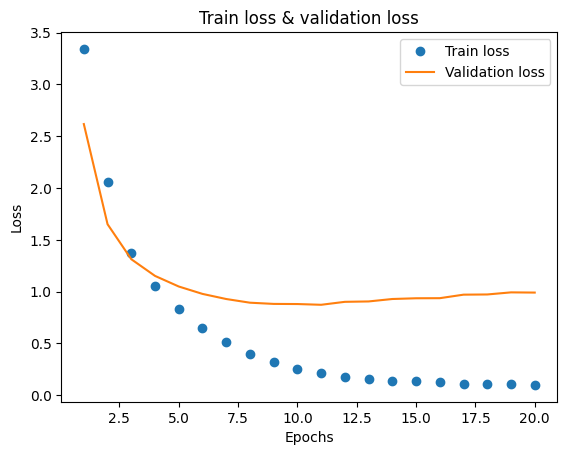

In [56]:
import matplotlib.pyplot as plt
history_dict = history.history

epochs = np.arange(1,21)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train loss & validation loss')
plt.plot(epochs, train_loss, 'o', label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()
plt.show()

Loss stops decreasing somewhere around 9 epochs.

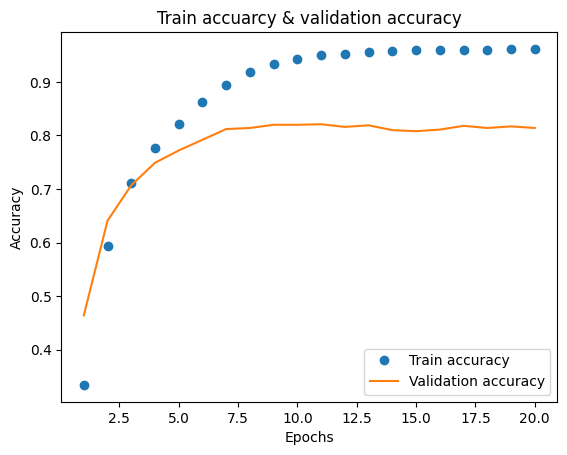

In [57]:
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train accuarcy & validation accuracy')
plt.plot(epochs, train_acc, 'o', label='Train accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.legend()
plt.show()

In [58]:
model.fit(X_train, y_train, epochs=9, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/9
16/16 [==============================] - 0s 10ms/step - loss: 0.0989 - accuracy: 0.9599 - val_loss: 1.0009 - val_accuracy: 0.8130
Epoch 2/9
16/16 [==============================] - 0s 7ms/step - loss: 0.1017 - accuracy: 0.9602 - val_loss: 1.0215 - val_accuracy: 0.8090
Epoch 3/9
16/16 [==============================] - 0s 7ms/step - loss: 0.0914 - accuracy: 0.9605 - val_loss: 1.0205 - val_accuracy: 0.8170
Epoch 4/9
16/16 [==============================] - 0s 7ms/step - loss: 0.0888 - accuracy: 0.9629 - val_loss: 1.0179 - val_accuracy: 0.8110
Epoch 5/9
16/16 [==============================] - 0s 7ms/step - loss: 0.0900 - accuracy: 0.9620 - val_loss: 1.0376 - val_accuracy: 0.8120
Epoch 6/9
16/16 [==============================] - 0s 7ms/step - loss: 0.0960 - accuracy: 0.9603 - val_loss: 1.0348 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 0s 7ms/step - loss: 0.0907 - accuracy: 0.9603 - val_loss: 1.0538 - val_accuracy: 0.8100
Epoch 8/9
16/16 [=========

In [59]:
res = model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 1.1908 - accuracy: 0.7916


In [17]:
pred = model.predict(X_test)

71/71 [==============================] - 0s 880us/step


In [24]:
len(pred[0]), np.argmax(pred[0]), np.sum(pred[0]) # hmm it should sum up to 1

(46, 3, 0.99999994)

Different options for labels:

In [26]:
y_train = np.array(y_train)
y_test = np.array(y_test)
# however, it is necessary to change the function of the loss
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])